IMPORTING PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor

LOADING DATA

In [2]:
raw_data = pd.read_csv('C:/Users/ronin/Google Drive/IAS ML MODEL/ML MODELLING/1500-1800-1.33-1.5.csv')
# print(raw_data.info())

In [3]:
raw_data.columns =['REF'] + [''] * (len(raw_data.columns)-1) #making REF column of refractive index which is our LABEL

raw_data.head()

,REF,,,,,,,,,,...,,,,,,,,,,
0,1.3334,0.005599,0.005607,0.005619,0.005636,0.005658,0.005685,0.005718,0.005758,0.005805,...,0.006759,0.006558,0.006369,0.006191,0.006022,0.005862,0.005710,0.005565,0.005427,0.005294
1,1.3351,0.005589,0.005596,0.005606,0.005622,0.005642,0.005667,0.005698,0.005735,0.005779,...,0.006777,0.006576,0.006386,0.006208,0.006039,0.005878,0.005726,0.005580,0.005441,0.005309
2,1.3368,0.005579,0.005584,0.005594,0.005608,0.005626,0.005649,0.005678,0.005713,0.005754,...,0.006795,0.006593,0.006403,0.006224,0.006055,0.005894,0.005741,0.005596,0.005456,0.005323
3,1.3385,0.005569,0.005573,0.005582,0.005594,0.005611,0.005633,0.005659,0.005692,0.005731,...,0.006813,0.006611,0.006421,0.006241,0.006071,0.005910,0.005757,0.005611,0.005472,0.005338
4,1.3402,0.005559,0.005563,0.005570,0.005581,0.005597,0.005617,0.005642,0.005672,0.005709,...,0.006832,0.006629,0.006438,0.006259,0.006088,0.005927,0.005773,0.005627,0.005487,0.005353


PLOTTING A ROW

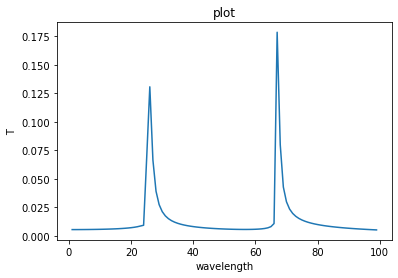

In [4]:
# r2 = raw_data.iloc[:,1:]
x = list(range(1, 100))
y = raw_data.iloc[1,1:]
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('wavelength')
# naming the y axis
plt.ylabel('T')
  
# giving a title to my graph
plt.title('plot')
  
# function to show the plot
plt.show()

In [5]:
y = raw_data['REF'] #Y is our label vector
raw_data.drop(['REF'], axis=1, inplace=True)
print(y)

0     1.3334
1     1.3351
2     1.3368
3     1.3385
4     1.3402
       ...  
94    1.4932
95    1.4949
96    1.4966
97    1.4983
98    1.5000
Name: REF, Length: 99, dtype: float64


SPLITTING TO TRAIN AND TEST DATA

In [6]:
X_train, X_test, y_train, y_test = train_test_split(raw_data, y, test_size=0.1, random_state=42)

APPLYING RANDOM FOREST REGRESSION MODEL

In [7]:
regr = RandomForestRegressor(n_estimators=5, max_depth=10, max_leaf_nodes=100, min_samples_leaf=1, random_state=4200)
m1 = regr.fit(X_train,y_train)
m1.score(X_train,y_train)

0.9996119930361852

MAKE PREDICTIONS FROM TEST SET

In [8]:
y_pred = (m1.predict(X_test))

CALCULATE RMS ERROR

In [9]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=True)
print(rms)

2.2888799999999124e-06


PREDICTATED VALUES

In [10]:
y_pred

array([1.43846, 1.40072, 1.49592, 1.364  , 1.4966 , 1.47654, 1.44254,
       1.40548, 1.34938, 1.33748])

In [11]:
y_test

62    1.4388
40    1.4014
95    1.4949
18    1.3640
97    1.4983
84    1.4762
64    1.4422
42    1.4048
10    1.3504
0     1.3334
Name: REF, dtype: float64

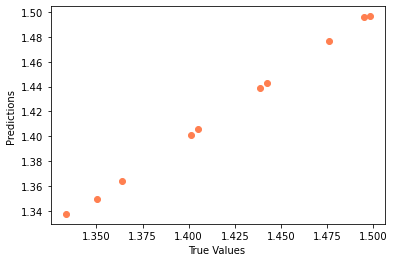

In [45]:
plt.scatter(y_test,y_pred, c='coral')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
# plt.axis('equal')
# plt.axis('square')
plt.show()


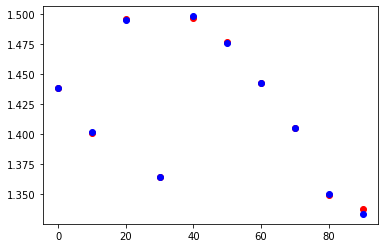

In [44]:
x = np.linspace(0,90,y_test.shape[0])
plt.scatter(x, y_pred, color ='red') # red shows predicted
plt.scatter(x, y_test, color ='blue')  #blue is actual
plt.show()
# hence perfect overlap shows good prediction